### Verifying the validity of the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.load('spec_resampled_array.npy')
y = np.load('labels_array.npy')

In [27]:
x.shape, y.shape

((1754, 2048, 80), (1754,))

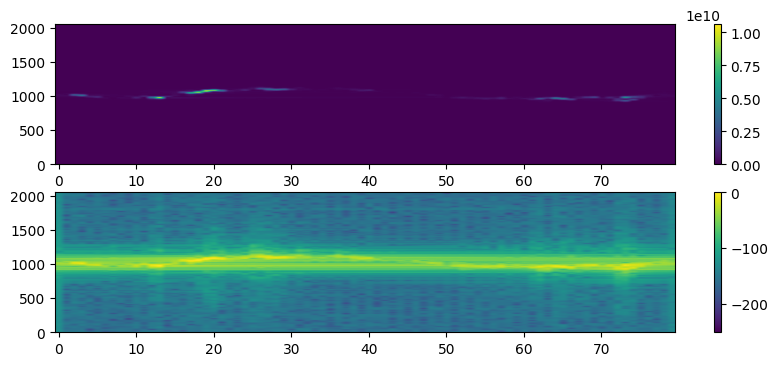

In [28]:
# Plot a spectrogram
spec = x[3,:,:]

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.imshow(abs(spec), aspect='auto', origin='lower')
plt.colorbar()

plt.subplot(212)
plt.imshow(20*np.log10(abs(spec)/np.max(abs(spec))), aspect='auto', origin='lower')
plt.colorbar()
plt.show()

Oopsie, spectrogram not normalized. Let's fix that:

In [29]:
num_samples, num_freqs, num_frames = x.shape

scaled_specs = np.zeros((num_samples, num_freqs, num_frames))
for i in range(num_samples):
    spec = x[i,:,:]
    scaled_specs[i,:,:] = 20*np.log10(abs(spec)/np.max(abs(spec)))

np.save('scaled_spec_resampled_array.npy', scaled_specs)

Let's see if it works

In [30]:
x_scaled = np.load('scaled_spec_resampled_array.npy')
x_scaled.shape

(1754, 2048, 80)

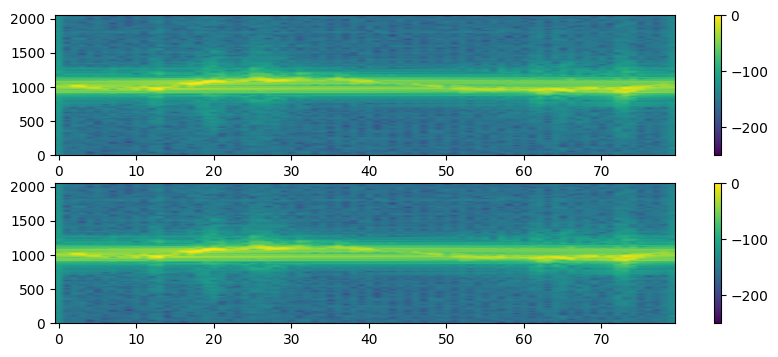

In [31]:
# Plot a spectrogram
spec = x[3,:,:]
new_spec = x_scaled[3,:,:]

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.imshow(20*np.log10(abs(spec)/np.max(abs(spec))), aspect='auto', origin='lower')
plt.colorbar()

plt.subplot(212)
plt.imshow(new_spec, aspect='auto', origin='lower')
plt.colorbar()
plt.show()

In [33]:
np.all(new_spec == 20*np.log10(abs(spec)/np.max(abs(spec))))

True

Hell Yeah